In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('BankNote_Authentication.csv')

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>]],
      dtype=object)

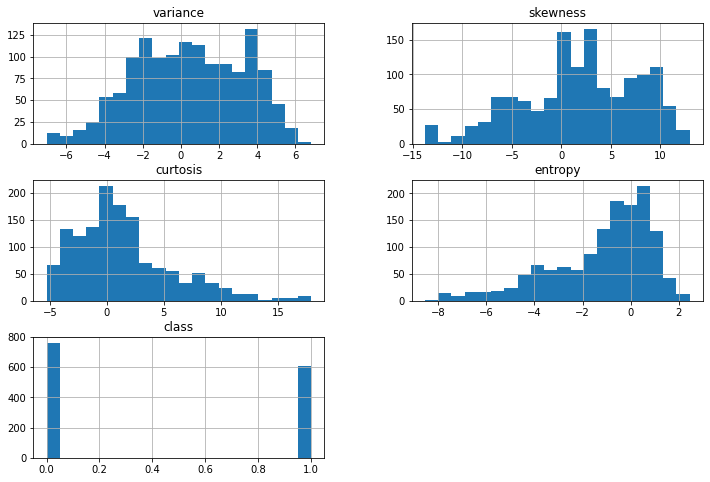

In [39]:
df.hist(bins=20,figsize=(12,8))

In [40]:
from pandas.plotting import scatter_matrix


In [41]:
attr=['variance','skewness','curtosis','entropy','class']

array([[<AxesSubplot:xlabel='variance', ylabel='variance'>,
        <AxesSubplot:xlabel='skewness', ylabel='variance'>,
        <AxesSubplot:xlabel='curtosis', ylabel='variance'>,
        <AxesSubplot:xlabel='entropy', ylabel='variance'>,
        <AxesSubplot:xlabel='class', ylabel='variance'>],
       [<AxesSubplot:xlabel='variance', ylabel='skewness'>,
        <AxesSubplot:xlabel='skewness', ylabel='skewness'>,
        <AxesSubplot:xlabel='curtosis', ylabel='skewness'>,
        <AxesSubplot:xlabel='entropy', ylabel='skewness'>,
        <AxesSubplot:xlabel='class', ylabel='skewness'>],
       [<AxesSubplot:xlabel='variance', ylabel='curtosis'>,
        <AxesSubplot:xlabel='skewness', ylabel='curtosis'>,
        <AxesSubplot:xlabel='curtosis', ylabel='curtosis'>,
        <AxesSubplot:xlabel='entropy', ylabel='curtosis'>,
        <AxesSubplot:xlabel='class', ylabel='curtosis'>],
       [<AxesSubplot:xlabel='variance', ylabel='entropy'>,
        <AxesSubplot:xlabel='skewness', ylabel='en

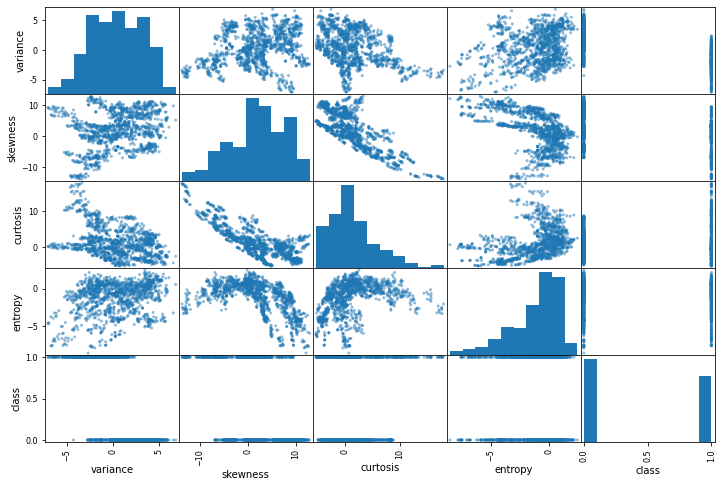

In [42]:
scatter_matrix(df[attr],figsize=(12,8))

In [5]:
X=df.drop('class',axis=1)

In [6]:
y=df['class']

In [7]:
y.value_counts()

0    762
1    610
Name: class, dtype: int64

In [8]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [10]:
df.isnull().values.any()

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


Text(0, 0.5, 'Frequency')

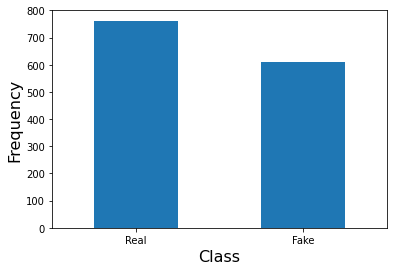

In [12]:
y.value_counts().plot(kind='bar',rot=0)
plt.xticks(range(2),labels=['Real','Fake'])
plt.xlabel('Class',fontsize=16)
plt.ylabel('Frequency',fontsize=16)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf=RandomForestClassifier()

In [18]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
y_pred=clf.predict(X_test)

In [20]:
clf.score(X_test,y_test)

0.9927272727272727

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
accuracy_score(y_test,y_pred)

0.9927272727272727

In [23]:
confusion_matrix(y_test,y_pred)

array([[148,   0],
       [  2, 125]])

In [24]:
import pickle

In [25]:
pickle.dump(clf,open('model.pkl','wb'))

In [35]:
clf.predict([[0,1,0,0]])

array([1])